Here's a basic Python code example for both **Linear Regression** and **Logistic Regression** in a financial context. This code will demonstrate how to predict price movements using linear regression and how to classify buy/sell signals using logistic regression.

We will use the **pandas** library for data manipulation, **scikit-learn** for building the models, and **matplotlib** for visualizing the results.

### Install necessary libraries (if not already installed):
```bash
pip install pandas scikit-learn matplotlib
```

### Python Code:

Linear Regression Mean Squared Error: 107.23763620845268


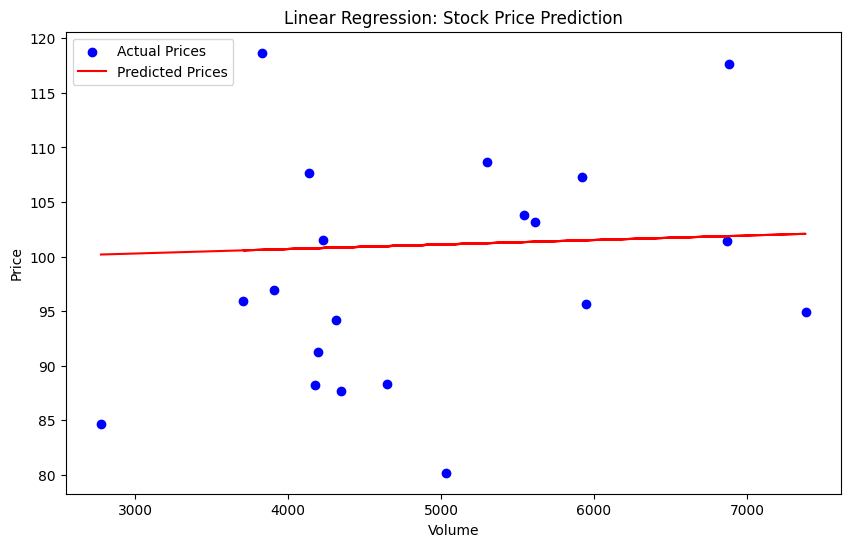

Logistic Regression Accuracy: 25.00%


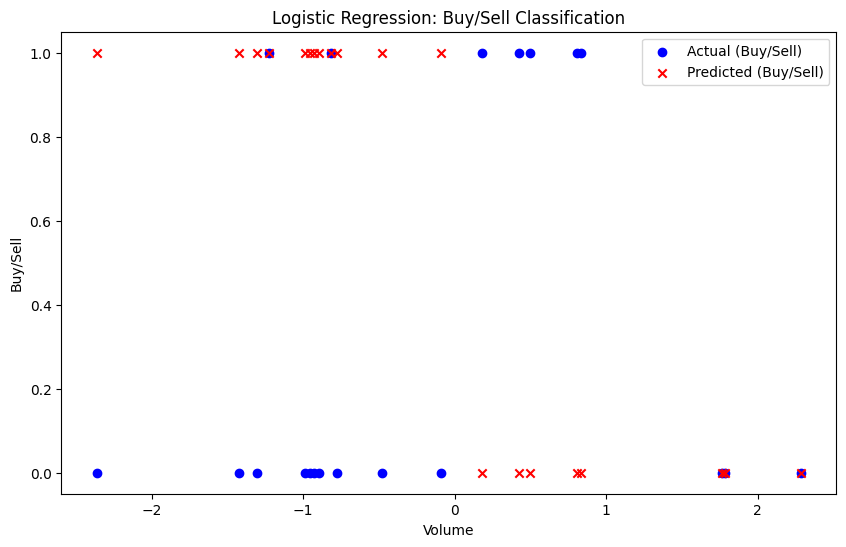

In [4]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.preprocessing import StandardScaler

# Generate example data (This is for demonstration purposes)
np.random.seed(0)

# Example: Simulated stock data with 'Close Price' and 'Volume' as features
data = pd.DataFrame({
    'Close': np.random.randn(100) * 10 + 100,  # Simulated closing prices
    'Volume': np.random.randn(100) * 1000 + 5000,  # Simulated trading volume
})

# Linear Regression Example (Price Prediction)
X = data[['Volume']]  # Feature: Volume
y = data['Close']  # Target: Close price

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predictions
y_pred = linear_model.predict(X_test)

# Evaluate Linear Regression
mse = mean_squared_error(y_test, y_pred)
print(f'Linear Regression Mean Squared Error: {mse}')

# Visualize the Linear Regression result
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Prices')
plt.plot(X_test, y_pred, color='red', label='Predicted Prices')
plt.title('Linear Regression: Stock Price Prediction')
plt.xlabel('Volume')
plt.ylabel('Price')
plt.legend()
plt.show()


# Logistic Regression Example (Buy/Sell Classification)
# Create a simple classification target (0 = Sell, 1 = Buy)
# Example: If the price went up in the last 3 days, consider it as 'Buy' (1)
data['Price Change'] = data['Close'].diff()
data['Target'] = (data['Price Change'] > 0).astype(int)  # 1 if price went up, 0 if down

X_class = data[['Volume']]  # Feature: Volume
y_class = data['Target']  # Target: Buy (1) / Sell (0)

# Split data into train and test sets
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Standardizing the data (important for logistic regression)
scaler = StandardScaler()
X_train_class = scaler.fit_transform(X_train_class)
X_test_class = scaler.transform(X_test_class)

# Train Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train_class, y_train_class)

# Predictions
y_pred_class = logistic_model.predict(X_test_class)

# Evaluate Logistic Regression
accuracy = accuracy_score(y_test_class, y_pred_class)
print(f'Logistic Regression Accuracy: {accuracy * 100:.2f}%')

# Visualize the Logistic Regression result
plt.figure(figsize=(10, 6))
plt.scatter(X_test_class, y_test_class, color='blue', label='Actual (Buy/Sell)')
plt.scatter(X_test_class, y_pred_class, color='red', label='Predicted (Buy/Sell)', marker='x')
plt.title('Logistic Regression: Buy/Sell Classification')
plt.xlabel('Volume')
plt.ylabel('Buy/Sell')
plt.legend()
plt.show()


